In [1]:
# about


In [1]:
import pandas as pd

# Semantic text similarity
* Such a task in literature is referred to as Semantic Text Similarity(STS). It deals with determining how similar two pieces of texts are. This would include not just the syntactic similarity, that is how similar or same are the words that are used in the two sentence, but also the semantic similarity that captures the similarity in what is being conveyed using the two sentences, i.e the meaning of the text plays an important role in determining what is similar and not similar.

# Similarity measurements

## Jaccard Similarity

## Earth Mover Distance

## Jensen-Shannon distance

## Cosine Similarity

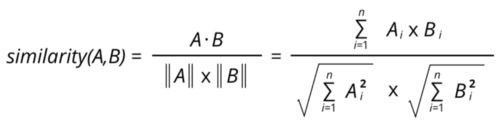

* What is it?
    * measure of similarity between two non-zero vectors using the inner product (measures the cosine of the angle between them)
* Why use it?
    * If two documents are similar and if they are far apart in the Euclidean space, they could still be pretty close to each other. This is captured by cosine distance and hence is advantageous.
* Where do we use it?
    * between pairs of sentence strings? NO
    * <b> between vectors </b>


### Word/sentence vectors
* What is it?
    * a row of real valued numbers where each point captures a dimension of the word's/sentence's meaning and where semantically similar words/sentences have similar vectors
    
### how do we get these vectors
* word embedding
    * word2vec, GloVe, BERT word embeddings, ELMo and so on.
* sentence embedding
    * BERT sentence embedding, Universal Sentence Encoder, etc.
    
    
### comibination recommended
`word2vec + Universal Sentence Encoder`
---

---
## Word2Vec

* word2vec comes in two variants: Skip-Gram and Continuous Bag of Words model (CBOW).

### Skip-Gram
* it uses the current word to predict the surrounding window of context words
* it weighs the nearby context words more heavily than the distant context words


* CONSIDER w(t)as the input word
    * the usual dot product between the weight matrix and the input vector w(t) is done by the single hidden layer. 
    * We apply the softmax function to the dot product between the output vector of the hidden layer and the weight matrix. 
    * This gives us the probabilities of the words that appear in the context of w(t) at the current word location

* how do we get vector representation of the sentence instead of just word embedding?
    * averaging the word embedding of all the words of that sentence
    

## Provided code

In [2]:
import gensim
from gensim.models import Word2Vec

In [3]:
w2vmodel = gensim.models.KeyedVectors.load_word2vec_format(
    ('models/GoogleNews-vectors-negative300.bin.gz'), binary=True)

def sent2vec(s):                               
    '''
    Finding word2vec vector representation of sentences                               
    @param s  : sentence  
    '''                                    
    words = str(s).lower()                               
    words = word_tokenize(words)                               
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    
    featureVec = np.zeros((300,), dtype="float32")
    nwords = 0
                               
    for w in words:                                   
        try:                                       
            nwords = nwords + 1                                       
            featureVec = np.add(featureVec, w2vmodel[w])
        except:                                       
            continue                               
        # averaging                               
        if nwords > 0:                                   
            featureVec = np.divide(featureVec, nwords)
    return featureVec

def get_w2v_vectors(list_text1, list_text2): 
    '''
    Computing the word2vec vector representation of list of sentences
    @param list_text1 : first list of sentences
    @param list_text2 : second list of sentences 
    ''' 
    print("Computing first vectors…")
    text1_vectors = np.zeros((len(list_text1), 300))
    for i, q in tqdm(enumerate(list_text1)):
        text1_vectors[i, :] = sent2vec(q)
    text2_vectors = np.zeros((len(list_text2), 300))
    for i, q in tqdm(enumerate(list_text2)):
        text2_vectors[i, :] = sent2vec(q)
    return text1_vectors, text2_vectors

FileNotFoundError: [Errno 2] No such file or directory: 'models/GoogleNews-vectors-negative300.bin.gz'